In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class Genetic_algorithm_knapsack:

    def __init__(self,weights,values,max_weight,max_num_of_items=np.inf,min_num_of_items=1,num_of_population=10,p_crossing=0.8, p_mutation=0.1, treshold=0.5, starting_point=10) -> None:

        assert len(weights) == len(values), 'weights and values number is different'
        assert min(weights) <= max_weight, "solution doesn't exist"
        assert max_num_of_items > min_num_of_items, 'max num of items is lower than min num of items'

        self.weights = np.array(weights)
        self.max_weight = max_weight
        self.values = np.array(values)
        self.liczba_bitow = len(weights)
        self.num_of_population = num_of_population
        self.p_crossing = p_crossing
        self.p_mutation = p_mutation
        self.max_num_of_items = max_num_of_items
        self.min_num_of_items = min_num_of_items
        self.treshold = treshold
        self.starting_point = starting_point




    def fitness_function(self,bits):

        bits = np.array(bits)
        weight_sum = np.sum(bits * self.weights)

        if weight_sum > self.max_weight or np.sum(bits) > self.max_num_of_items or np.sum(bits) < self.min_num_of_items: # if value doesn't mach constraint give it as 0

            return 0
        else:

            return np.sum(bits * self.values)
        
  
    

    def crossover(self,r1, r2):
        d1, d2 = r1.copy(), r2.copy() # at the starts kids are parents copies

        if np.random.rand() < self.p_crossing:

            pt = np.random.randint(1, len(r1)-2) # shuffling crosssover
           
            d1 = r1[:pt] + r2[pt:]
            d2 = r2[:pt] + r1[pt:]

        return [d1, d2] 

    def selection(self,population, results):

        choosed = np.random.randint(len(population)) # first selection is random

        for i in np.random.randint(0, len(population), 2):
            
            if results[i] > results[choosed]: # comparing
                choosed = i

        return population[choosed]
    
    

    def mutation(self,bits):

        for i in range(len(bits)):

            if np.random.rand() < self.p_mutation: # check if mutate
                bits[i] = 1 - bits[i] # mutation
        
        return bits
    
    def repair_function(self,bits):

        if np.sum(bits) < self.min_num_of_items:

            choosed_bits = [np.random.randint(0, len(bits)) for _ in range(self.max_num_of_items)]

            for i in choosed_bits:
                bits[i] = 1

        elif np.sum(bits) >  self.max_num_of_items:

            while np.sum(bits) >  self.max_num_of_items:

                choosed_bits = [i for i,b in enumerate(bits) if b == 1]
                choosed_bit = np.random.choice(choosed_bits)
                bits[choosed_bit] = 0

        
        while self.fitness_function(bits) == 0:

            dic_choosed_prices = {i:self.weights[i] for i,b in enumerate(bits) if b == 1}
            most_wage = max(dic_choosed_prices, key=dic_choosed_prices.get)

            cheaper_bits = [i for i,b in enumerate(bits) if self.weights[most_wage] > self.weights[i]]

            replacing_bit = np.random.choice(cheaper_bits)

            bits[most_wage] = 0
            bits[replacing_bit] =  1
        
        return bits
                

    def algorithm(self):

        population = [np.random.randint(0, 2, self.liczba_bitow).tolist() for _ in range(self.num_of_population)] # population Initialization
        best_bytes, best_results = 0, self.fitness_function(population[0])
        gen = 0
        best_gen = 0
        BF_list = []

        best_history= [0]

        while True:

            gen += 1

            # reparir bits
            population = [self.repair_function(c) for c in population]

            # calculating values
            results = [self.fitness_function(c) for c in population]


            # finding best result
            for i in range(self.num_of_population):
                if results[i] > best_results:
                    best_bytes, best_results = population[i], results[i]
                    best_gen = gen
                    # print(f"w generacji {gen}, najlepsza populacja {populacja[i]} ma wynik {results[i]}")
            
            
            best_history.append(best_results)

            BF_list.append(best_results)
            del BF_list[0]
            
            # wybieranie rodzicow
            parents = [self.selection(population, results) for _ in range(self.num_of_population)]
        
            # kolejna generacja
            kids = list()
            for i in range(0, self.num_of_population, 2):

                
                r1, r2 = parents[i], parents[i+1]

                for kid in self.crossover(r1, r2):
                    kid = self.mutation(kid)
                    kids.append(kid) # zapisanie dziecka

            population = kids # podmiana populacji
            if gen <= self.starting_point:
                continue

            running_mean = ((1/self.starting_point)*np.sum([(BFi - best_results)**2 for BFi in BF_list]))

            if running_mean<self.treshold:
                break

        return [best_bytes, best_results,best_history]
    

C:\Users\Leniu\AppData\Local\Temp\ipykernel_25996\2594598023.py:18: RuntimeWarning: divide by zero encountered in log2
  plt.plot([i for i in range(len(data))],np.log2(average), label=f'n:{n},pk:{crossing},pop:{popuplation},ws:{treshold}')
C:\Users\Leniu\AppData\Local\Temp\ipykernel_25996\2594598023.py:18: RuntimeWarning: divide by zero encountered in log2
  plt.plot([i for i in range(len(data))],np.log2(average), label=f'n:{n},pk:{crossing},pop:{popuplation},ws:{treshold}')
C:\Users\Leniu\AppData\Local\Temp\ipykernel_25996\2594598023.py:18: RuntimeWarning: divide by zero encountered in log2
  plt.plot([i for i in range(len(data))],np.log2(average), label=f'n:{n},pk:{crossing},pop:{popuplation},ws:{treshold}')
C:\Users\Leniu\AppData\Local\Temp\ipykernel_25996\2594598023.py:18: RuntimeWarning: divide by zero encountered in log2
  plt.plot([i for i in range(len(data))],np.log2(average), label=f'n:{n},pk:{crossing},pop:{popuplation},ws:{treshold}')
C:\Users\Leniu\AppData\Local\Temp\ipyker

KeyboardInterrupt: 

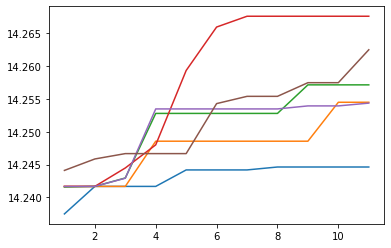

In [4]:


values = [np.random.randint(0,1000) for _ in range(1000)]
weights = [np.random.randint(0,1000) for _ in range(1000)]

for n in [10,50,100]:
    for crossing in [0.001, 0.01, 0.1]:
        for popuplation in [10,50,100]:
            for treshold in [0.001,0.01,0.1]:

                results = []
                for i in range(4):
                    g1 = Genetic_algorithm_knapsack(values,weights,np.median(weights),num_of_population=popuplation,starting_point=n,p_crossing=crossing,treshold=treshold)
                    naj_bity,naj_wynik,data = g1.algorithm()
                    results.append(data)

                average = np.mean(np.array(results), axis=0)
                results = []
                name = f'n:{n}, prawdopodobieństwo krzyżowania:{crossing}, liczba populacji:{popuplation}, warunek stopu:{treshold}'
                plt.plot([i for i in range(len(data))],np.log2(average), label=f'n:{n},pk:{crossing},pop:{popuplation},ws:{treshold}')
    
    plt.title(name)
    plt.ylabel('Sumaryczna średnia oglądalność [log2]')
    plt.xlabel('numer generacji')
    plt.legend(loc="upper left")
    plt.show()


In [ ]:
results = np.mean(average, axis=0)
results

array([    0.  , 15444.75, 15444.75, 15459.5 , 15540.25, 15607.  ,
       15792.75, 15792.75, 15792.75, 15792.75, 15792.75, 15792.75])

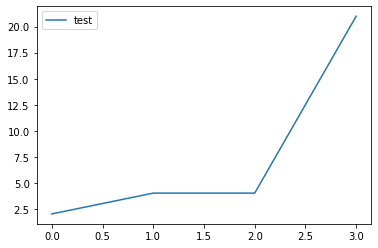

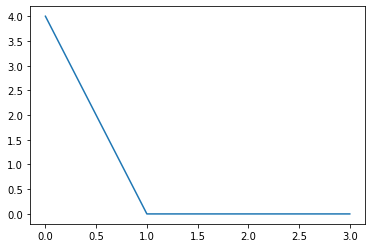

In [3]:
plt.plot([2,4,4,21],label='test')
plt.legend(loc="upper left")
plt.show()
plt.plot([4,0,0,0])
plt.show()

